# NOTEBOOK FOR TESTING PURPOSE

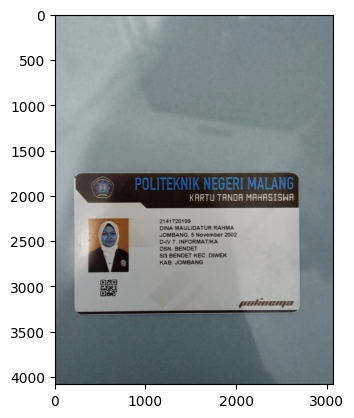

In [3]:
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('image.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

## use cv.THRESH_BINARY instead of ..._INV
## this will set the background black instead of white
## and the foreground to white instead of black
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
##                                  ^^^^^^^^^^^^^^^^^

cnts,_ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

## sort the contours from largest to smallest.
## the largest will contain your image
cnts = sorted(cnts, key=lambda x:-len(x))

## place a rectangle around the largest contour
rect = cv.boundingRect(cnts[0])
x = rect[1] # column coordinate of top left corner of rectangle
y = rect[0] # row coordinate of top left corner of rectangle
width = rect[2] # width of rectangle
height = rect[3] # height of rectangle
crop = img[y:y+height, x:x+width]
plt.imshow(crop)

In [13]:
from ocr_ktm import ocr_raw
import cv2
import re

result_raw = ocr_raw(cv2.imread('image.jpg'))
nim = ''
nama = ''
ttl = ''
jurusan = ''
alamat = ''

lines = result_raw.split('\n')

for i in lines:
    print(i)


# Find NIM and its index
nim_index = next((i for i, line in enumerate(lines) if re.match(r'^\d+$', line)), None)

if nim_index is not None:
    nim = lines[nim_index]

    # Extract other information based on the index of NIM
    if nim_index + 1 < len(lines):
        nama = lines[nim_index + 1]

    if nim_index + 2 < len(lines):
        ttl = lines[nim_index + 2]

    if nim_index + 3 < len(lines):
        jurusan = lines[nim_index + 3]

    if nim_index + 4 < len(lines):
        alamat = ' '.join(lines[nim_index + 4:])
        
print('nim: ' + nim)
print('nama: ' + nama)
print('ttl: ' + ttl)
print('jurusan: ' + jurusan)
print('alamat: ' + alamat)

2141720112
MAHARDHIKA BREDY D'
PANGKALAN BUN, 24 Se
D-IV T. INFORMATIKA
DS. KUNCIR

311 KUNCIR KEC. NGETC
KAB. NGANJUK


nim: 2141720112
nama: MAHARDHIKA BREDY D'
ttl: PANGKALAN BUN, 24 Se
jurusan: D-IV T. INFORMATIKA
alamat: DS. KUNCIR  311 KUNCIR KEC. NGETC KAB. NGANJUK  
